In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
%matplotlib inline

## Exploting the Data

In [2]:
raw_csv_data = pd.read_csv("Index2018.csv")

In [3]:
df_comp = raw_csv_data.copy()

In [4]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [5]:
df_comp.count()

date      6269
spx       6269
dax       6269
ftse      6269
nikkei    6269
dtype: int64

In [6]:
df_comp.describe() #describe only describes the numerical attributes not (date) that's why data attribute isn't in the following table

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [7]:
# Number of NA values
df_comp.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

## Plotting the Data

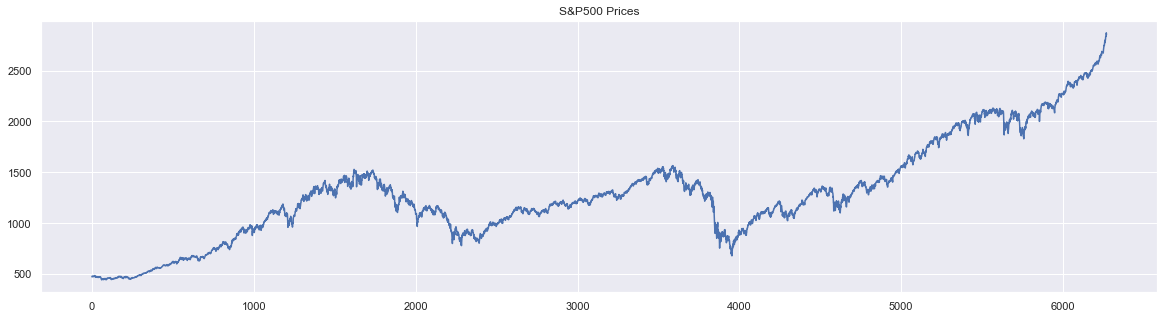

In [8]:
df_comp.spx.plot(figsize = (20,5), title = "S&P500 Prices")

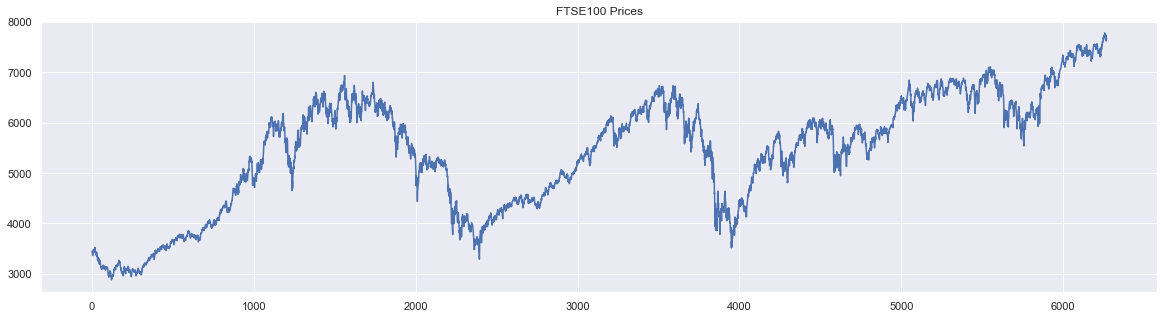

In [9]:
df_comp.ftse.plot(figsize = (20,5), title = "FTSE100 Prices")

Text(0.5, 1.0, 'SPX vs FTSE')

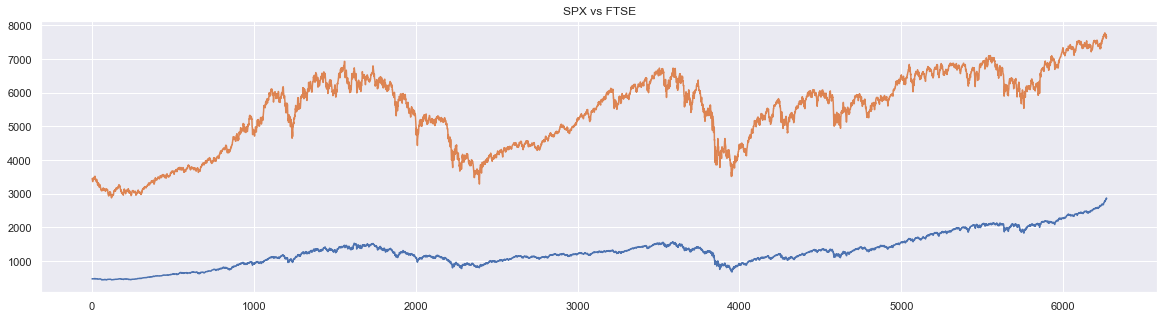

In [10]:
df_comp.spx.plot(figsize = (20,5), title = "S&P500 Prices")
df_comp.ftse.plot(figsize = (20,5), title = "FTSE100 Prices")
plt.title("SPX vs FTSE")

#### Note: The SPX curve is actually not flat but in the plot above it's compounded

## QQ Plot

In [11]:
import scipy.stats
import pylab

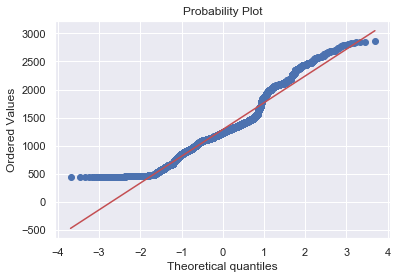

In [14]:
scipy.stats.probplot(df_comp.spx, plot = pylab)
pylab.show()

## Transforming String Inputs into Date Time Values

### Length of the Time Period

In [15]:
# Let's convert date data into a "date" type
df_comp.date.describe() # not very informative

count           6269
unique          6269
top       07/07/2008
freq               1
Name: date, dtype: object

In [20]:
# Coverting the date so we can get actual useful stats
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True) # default format in pandas is mm/dd/yyyy

In [21]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [22]:
 df_comp.date.describe() # More detailed stats after conversion

count                    6269
unique                   6269
top       1999-08-23 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

## Setting the index

In [24]:
df_comp.set_index("date", inplace = True) # Date is now the index
# You can't manipulate or edit date values new as they became the index

In [25]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


### Setting the desired frequency

In [27]:
df_comp = df_comp.asfreq('d') # a for annual, d for daily, b = business days

In [28]:
df_comp.head() # NaN values start appearing

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25


In [32]:
# Now let's remove any data recorded during holidays or non-working hours
df_comp = df_comp.asfreq('b') 

In [34]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26
